# Codelab for Feedforward Neural Net

All rights reserved.

This material cannot be published, rewritten or redistributed in whole or part without the authors' written permission.

During tutorial/workshop, attendees will be separated into three groups. Each group will be conducting different activities.

Activity: "Cell" $\rightarrow$ "Run All" for testing the environment.

In [3]:
################################################################
#
# All rights reserved.
#
# This is a codelab for Feedforward Neural Net.
# Details include:
#   - Pre-process dataset
#   - Elaborate recipes
#   - Define procedures
#   - Train and test models
#   - Observe metrics
#
################################################################
from __future__ import print_function

import keras.callbacks as cb
from keras.datasets import mnist
from keras.layers.core import Activation, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from keras.regularizers import l1, l2
from keras.utils import np_utils

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import time

## Tutorial/workshop activity 1: Pre-processing

Each group performs different types of data pre-processing:<br />
1. Group A proceed w/o pre-processing datasets.
2. Group B proceed w/ normalizing datasets into the range of [0, 1].
3. Group C proceed w/ standardizing datasets by z-scoring (de-mean, uni-variance).

[See results](#Observe-Training-Process)

In [6]:
def PreprocessDataset():
    from sklearn import preprocessing
    ## Load dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    ## Transform labels to one-hot
    ## i.e., from '7' to [0,0,0,0,0,0,0,1,0,0]
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    
    ## Process features. Set numeric type
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    ## Reshape from a matrix of 28 x 28 pixels to 1-D vector of 784 dimensions
    x_train = np.reshape(x_train, (60000, 784))
    x_test = np.reshape(x_test, (10000, 784))

    ################################################################
    # Activity 1 (Pre-processing):
    # Group A: w/o pre-processing datasets.
    #
    # Group B: Min-Max Normalize value to [0, 1]
    # x_train /= 255
    # x_test /= 255
    #
    # Group C: proceed w/ standardizing datasets by z-scoring (de-mean, uni-variance).
    # x_train = preprocessing.scale(x_train)
    # x_test = preprocessing.scale(x_test)
    ################################################################  
    ## YOUR TURN: CHANGE HERE
    x_train /= 255
    x_test /= 255

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = PreprocessDataset()

In [7]:
## Show part of training data: features and labels
## Each row is a sample, and each column represents a feature.
print("{:^43}".format("x"), "|", "{:^4}".format("y"))
print("="*50)
for sample_id in range(10):
    print("{:.2f} {:.2f} ... {:.2f} {:.2f} {:.2f} ...  {:.2f} {:.2f}".format(
            x_train[sample_id][0], x_train[sample_id][1],
            x_train[sample_id][156], x_train[sample_id][157], x_train[sample_id][158],
            x_train[sample_id][-2], x_train[sample_id][-1]), "| ",
           "{:.0f}".format(y_train[sample_id][0]))

                     x                      |  y  
0.00 0.00 ... 0.49 0.53 0.69 ...  0.00 0.00 |  0
0.00 0.00 ... 0.99 0.99 0.99 ...  0.00 0.00 |  1
0.00 0.00 ... 0.00 0.00 0.00 ...  0.00 0.00 |  0
0.00 0.00 ... 0.00 0.00 0.49 ...  0.00 0.00 |  0
0.00 0.00 ... 0.00 0.00 0.00 ...  0.00 0.00 |  0
0.00 0.00 ... 0.10 0.39 0.48 ...  0.00 0.00 |  0
0.00 0.00 ... 0.00 0.00 0.00 ...  0.00 0.00 |  0
0.00 0.00 ... 0.99 0.99 0.99 ...  0.00 0.00 |  0
0.00 0.00 ... 0.00 0.00 0.00 ...  0.00 0.00 |  0
0.00 0.00 ... 0.00 0.00 0.00 ...  0.00 0.00 |  0


## Recipes for Neural Nets

In this section you will play with useful recipes for designing a neural net.
### Tutorial/workshop activity 2: Network Structure

Each group uses different types of ingredients:<br />
1. Group A uses **1** layer.
2. Group B uses **2** layers of a **tower-shaped** (same width) network. 
3. Group C uses **2** layers of a **pyramid-shaped** (shrink width) network.

[See results](#Observe-Training-Process)

### Tutorial/workshop activity 3: Activation Function

Each group uses different types of ingredients:
1. Group A uses Relu.
2. Group B uses Sigmoid.
3. Group C uses Tanh.

[See results](#Observe-Training-Process)

### Tutorial/workshop activity 4: Loss Function

Each group uses different types of ingredients:
1. Group A uses cross entropy.
2. Group B uses cross entropy.
3. Group C uses squared error.

[See results](#Observe-Training-Process)

### Tutorial/workshop activity 5: Dropout

Each group uses different types of ingredients:
1. Group A uses 0% dropout.
2. Group B uses 50% dropout.
3. Group C uses 90% dropout.

[See results](#Observe-Training-Process)

### Tutorial/workshop activity 6: Regularization

Each group uses different types of ingredients:
1. Group A uses L1-norm.
2. Group B uses L2-norm.
3. Group C uses no regularization.

[See results](#Observe-Training-Process)

In [8]:
def DefineModel():

    ################################################################
    # Activity 2 (Network Structure):
    # Group A: uses only 1 layer
    # second_layer_width = 0
    #
    # Group B: uses 2 layers of a tower-shaped (same width) network.
    # second_layer_width = 128
    #
    # Group C: uses 2 layers of a pyramid-shaped (shrink width) network.
    # second_layer_width = 64
    ################################################################
    first_layer_width = 128
    second_layer_width = 64    
    
    ################################################################
    # Activity 3 (Activation Function):
    # Group A uses ReLU.
    # activation_func = 'relu' 
    # 
    # Group B uses Sigmoid.
    # activation_func = 'sigmoid'
    #
    # Group C uses Tanh.
    # activation_func = 'tanh'
    ################################################################
    activation_func = 'relu' 

    ################################################################    
    # Activity 4 (Loss Function):
    # Group A uses cross entropy.
    # loss_function = 'categorical_crossentropy'
    # 
    # Group B uses cross entropy.
    # loss_function = 'categorical_crossentropy'
    # 
    # Group C uses squared error.
    # loss_function = 'mean_squared_error'
    ################################################################    
    loss_function = 'categorical_crossentropy'
    
    #################################################################    
    # Activity 5 (Dropout):
    # Group A uses 0% dropout.
    #
    # Group B uses 50% dropout.
    # dropout_rate = 0.5
    #
    # Group C uses 90% dropout.
    # dropout_rate = 0.9
    #################################################################    
    dropout_rate = 0.0
    
    ################################################################    
    # Activity 6 (Regularization):
    # Group A uses L1 regularizer
    # weight_regularizer = l1(0.01)
    #
    # Group B uses L2 regularizer
    # weight_regularizer = l2(0.01)
    # 
    # Group C uses no regularizer
    # weight_regularizer = None
    ################################################################
    weight_regularizer = None

    ################################################################    
    # Activity 8 (Learning Rate):
    # Group A uses learning rate of 0.1.
    # learning_rate = 0.1
    # 
    # Group B uses learning rate of 0.01.
    # learning_rate = 0.01
    #
    # Group C uses learning rate of 0.5.    
    # learning_rate = 0.5
    ################################################################
    learning_rate = 0.1
    
    ## Initialize model.
    model = Sequential()

    ## First hidden layer with 'first_layer_width' neurons. 
    ## Also need to specify input dimension.
    ## 'Dense' means fully-connected.
    model.add(Dense(first_layer_width, input_dim=784, W_regularizer=weight_regularizer))
    model.add(Activation(activation_func))
    if dropout_rate > 0:
        model.add(Dropout(0.5))

    ## Second hidden layer.
    if second_layer_width > 0:
        model.add(Dense(second_layer_width))
        model.add(Activation(activation_func))
        if dropout_rate > 0:
            model.add(Dropout(0.5))         
    
    ## Last layer has the same dimension as the number of classes
    model.add(Dense(10))
    ## For classification, the activation is softmax
    model.add(Activation('softmax'))
    ## Define optimizer. In this tutorial/codelab, we select SGD.
    ## You can also use other methods, e.g., opt = RMSprop()
    opt = SGD(lr=learning_rate, clipnorm=5.)
    ## Define loss function = 'categorical_crossentropy' or 'mean_squared_error'
    model.compile(loss=loss_function, optimizer=opt, metrics=["accuracy"])

    return model

## Define Training Procedure
### Tutorial/workshop activity 7: Mini-batch

Each group uses different types of ingredients:
1. Group A uses mini-batch of size 128.
2. Group B uses mini-batch of size 256.
3. Group C uses mini-batch of size 512.

[See results](#Observe-Training-Process)

### Tutorial/workshop activity 8: Learning Rate

Each group uses different types of ingredients:
1. Group A uses learning rate of 0.1.
2. Group B uses learning rate of 0.01.
3. Group C uses learning rate of 0.5.

[See results](#Observe-Training-Process)

In [9]:
def TrainModel(data=None, epochs=20):
    ################################################################
    # Activity 7 (Mini-batch):
    # Group A uses mini-batch of size 128.
    # batch = 128
    #
    # Group B uses mini-batch of size 256.
    # batch = 256
    # 
    # Group C uses mini-batch of size 512.
    # batch = 512
    ################################################################
    batch=128
    start_time = time.time()
    model = DefineModel()
    if data is None:
        print("Must provide data.")
        return
    x_train, x_test, y_train, y_test = data
    print('Start training.')
    ## Use the first 55,000 (out of 60,000) samples to train, last 5,500 samples to validate.
    history = model.fit(x_train[:55000], y_train[:55000], nb_epoch=epochs, batch_size=batch,
              validation_data=(x_train[55000:], y_train[55000:]))
    print("Training took {0} seconds.".format(time.time() - start_time))
    return model, history

## Start Training

In [ ]:
trained_model, training_history = TrainModel(data=[x_train, x_test, y_train, y_test])

Start training.
Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 3s - loss: 0.4668 - acc: 0.8677 - val_loss: 0.2131 - val_acc: 0.9406

## Define Plotting

In [12]:
def PlotHistory(train_value, test_value, value_is_loss_or_acc):
    f, ax = plt.subplots()
    ax.plot([None] + train_value, 'o-')
    ax.plot([None] + test_value, 'x-')
    ## Plot legend and use the best location automatically: loc = 0.
    ax.legend(['Train ' + value_is_loss_or_acc, 'Validation ' + value_is_loss_or_acc], loc = 0) 
    ax.set_title('Training/Validation ' + value_is_loss_or_acc + ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(value_is_loss_or_acc)  
 

## Observe Training Process

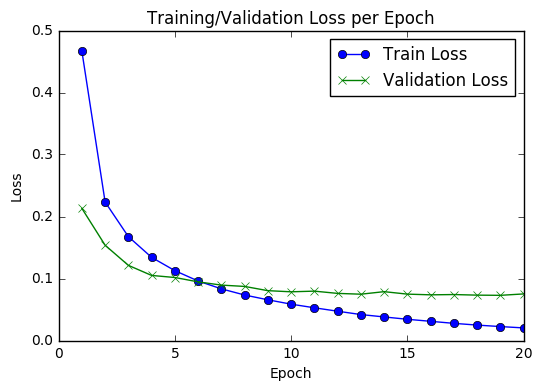

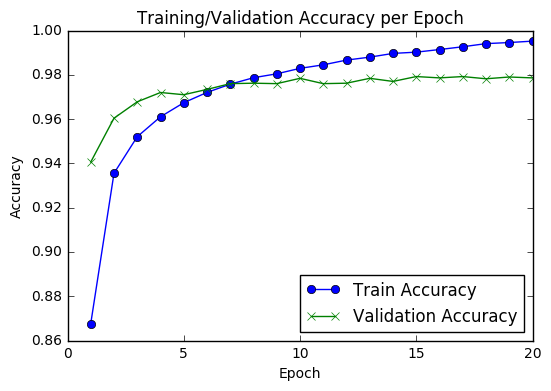

In [13]:
PlotHistory(training_history.history['loss'], training_history.history['val_loss'], 'Loss')
PlotHistory(training_history.history['acc'], training_history.history['val_acc'], 'Accuracy')

## Observe Regularization Effects


In [14]:
def drawWeightHistogram(x):
    ## the histogram of the data
    fig = plt.subplots()
    n, bins, patches = plt.hist(x, 50)
    plt.xlim(-0.5, 0.5)
    plt.xlabel('Weight')
    plt.ylabel('Count')
    zero_counts = (x == 0.0).sum()
    plt.title("Weight Histogram. Num of '0's: %d" % zero_counts)

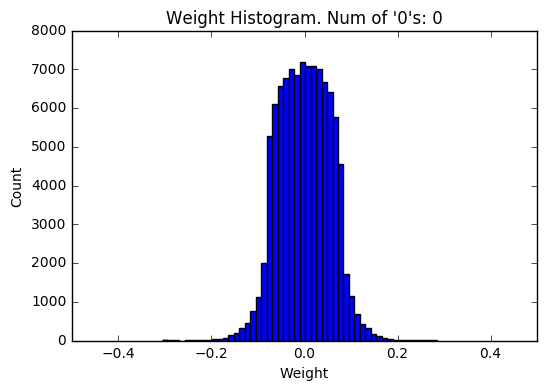

In [15]:
w1 = trained_model.layers[0].get_weights()[0].flatten()
drawWeightHistogram(w1)

## Define Testing Procedure


In [16]:
def TestModel(model=None, data=None):
    if model is None:
        print("Must provide a trained model.")
        return
    if data is None:
        print("Must provide data.")
        return
    x_test, y_test = data
    scores = model.evaluate(x_test, y_test)
    return scores

## Test Trained Model


In [17]:
test_score = TestModel(model=trained_model, data=[x_test, y_test])
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

 9920/10000 [============================>.] - ETA: 0s  256/10000 [..............................] - ETA: 0s

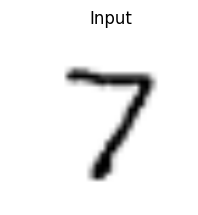

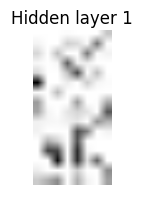

Final prediction: 7


In [18]:
def ShowInputImage(data):
    """Visualize input image."""
    plot = plt.figure()
    plot.set_size_inches(2,2)
    plt.imshow(np.reshape(-data, (28,28)), cmap='Greys_r')
    plt.title("Input")
    plt.axis('off')
    plt.show()
    
def ShowHiddenLayerOutput(input_data, target_layer_num):
    """Visualize output from the target hidden layer."""
    from keras import backend as K
    ## Backend converter: to TensorFlow
    target_layer = K.function(trained_model.inputs, [trained_model.layers[target_layer_num].output])
    ## Extract output from the target hidden layer.
    target_layer_out = target_layer([input_data])
    plot = plt.figure()
    plot.set_size_inches(2,2)
    plt.imshow(np.reshape(-target_layer_out[0][0], (16,-1)), cmap='Greys_r')
    plt.title("Hidden layer " + str(target_layer_num))
    plt.axis('off')
    plt.show()

def ShowFinalOutput(input_data):
    """Calculate final prediction."""
    from keras import backend as K
    ## Backend converter: to TensorFlow
    ## Calculate final prediction.
    last_layer = K.function(trained_model.inputs, [trained_model.layers[-1].output])
    last_layer_out = last_layer([input_data])
    print("Final prediction: " + str(np.argmax(last_layer_out[0][0])) )

ShowInputImage(x_test[0])
ShowHiddenLayerOutput(x_test, 1)
ShowFinalOutput(x_test)